## Zadanie - klasyczna detekcja obiektów

Dany jest obraz wzorcowy `calib` przedstawiający leki w organizerze.
Celem zadania będzie zaprojektowanie algorytmu detekcji i analizy obiektów,
pozwalającego na zliczenie leków poszczególnych gatunków z podziałem na komórki organizera.

Występuje 7 klas obiektów; od lewej w górnym rzędzie
* `line`\*: czerwono-białe kapsułki
* `keto`: niebieskie tabletki
* `carbon`: duże czarne kapsułki
* `probio`: duże białe kapsułki
* `biox`: małe białe tabletki
* `espu`: małe żółte kapsułki
* `dexi`\*: niebiesko-szare kapsułki (w dolnym rzędzie)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from typing import List

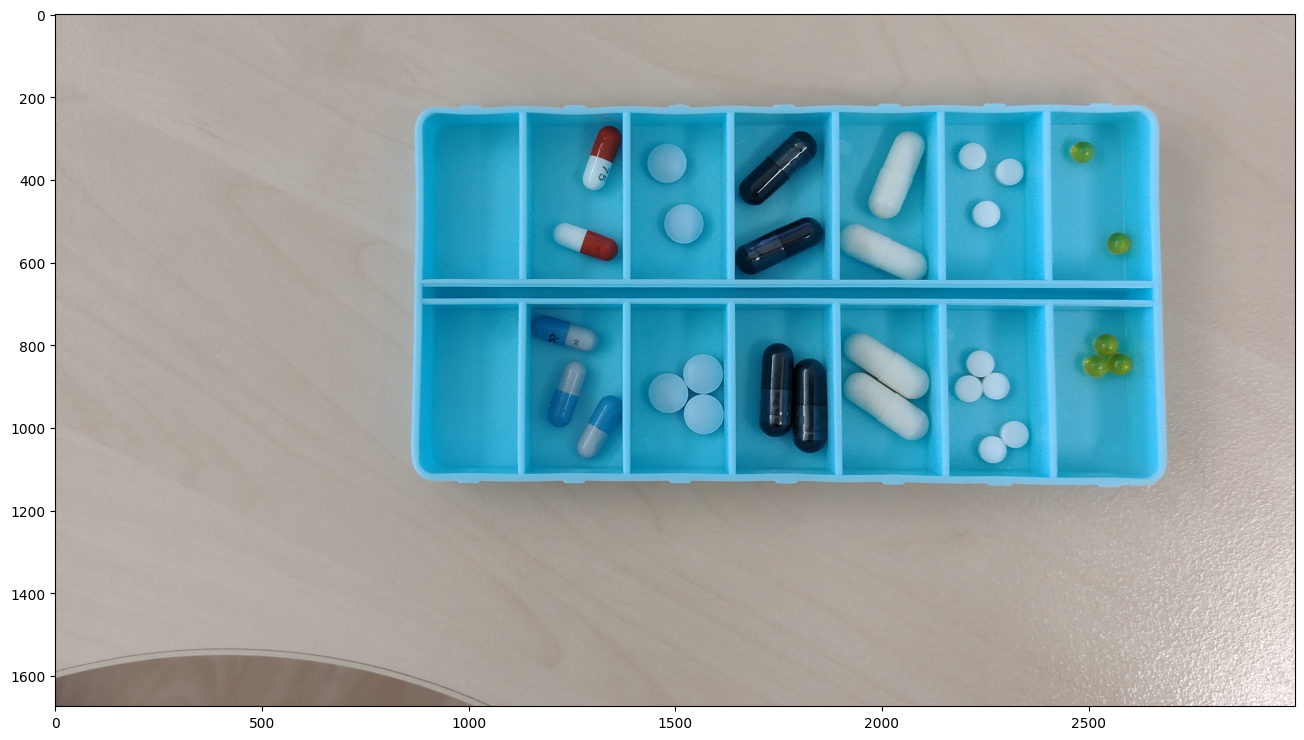

In [8]:
calib = cv2.imread('data/calib.png')
plt.subplots(1, 1, figsize=(16,9))[1].imshow(calib[..., ::-1]);

### Zadanie 1
Wykorzystując narzędzia poznane na poprzednich zajęciach (konwersja przestrzeni barw, detekcja krawędzi, binaryzacja, etc.) oraz [`cv2.findContours`](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0), zaproponuj algorytm detekcji obiektów (funkcja `detect_objects`).
Poprawnie działający algorytm powinien zwracać listę konturów lub bounding boksów reprezentujących poszczególne obiekty
(czy nawet dowolnych obiektów zawierających jedno i drugie).

W zależności od przyjętego podejścia, doimplementuj metodę `display_objects`, by wyświetlić rezultaty.

Podpowiedzi:
* zacznij od górnego wiersza, z pominięciem dwukolorowych kapsułek
* w drugiej kolejności podejmij problem stykających się obiektów
* dwukolorowe kapsułki są "dla ambitnych"

In [18]:
  # kernel_blur = np.ones((5,5))
  # kernel_blur /= np.size(kernel_blur)

  # preprocessed = cv2.filter2D(src=preprocessed, ddepth=-1, kernel=kernel_blur)
  # preprocessed = cv2.GaussianBlur(image, (9,9),0)

  
  # contours = get_countours(preprocessed[..., 2], global_bin=True)
  # display_cont(contours, cv2.cvtColor(image, cv2.COLOR_HSV2RGB), 'inner + sb')

  # sbx = cv2.Sobel(src=preprocessed, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
  # sby = cv2.Sobel(src=preprocessed, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
  
  # display_image(sbx, 'x')
  # display_image(sby, 'y')
  # sb = sb_to_img(sbx) + sb_to_img(sby)
  # pre_sb = sb + preprocessed[..., 1]

  # pre_sb = cv2.GaussianBlur(pre_sb, (9,9), 1)
  # pre_sb = cv2.filter2D(src=pre_sb, ddepth=-1, kernel=kernel_blur)
  
  # display_image(pre_sb, title='with sobel')
  # display_image(preprocessed[..., 1], title='without sobel')

  # contours = get_countours(preprocessed[..., 1] + sb, global_bin=True, max_size=2000)
  # display_cont(contours, cv2.cvtColor(image, cv2.COLOR_HSV2RGB), 'img + sb')

  # COLOR_HSV2RGB
  # kernel_blur = np.ones((3,3))
  # kernel_blur /= np.size(kernel_blur)
  # inner_blur = cv2.filter2D(src=inner_blur, ddepth=-1, kernel=kernel_blur)
  # inner_sb = cv2.GaussianBlur(inner, (3,3),0)

  # contours = get_countours(inner_blur)
  # display_cont(contours, inner, 'local')
  # contours = get_countours(inner_blur, global_bin=True)
  # display_cont(contours, inner, 'global')

  # contours = get_countours(inner_blur, max_size=300)
  # display_cont(contours, inner, 'inner')
  
  
  
  # print('not abs')
  # plt.imshow(sb, cmap='gray')
  # plt.show()

  #contours = get_countours(cv2.convertScaleAbs(sb))

  #display_cont(contours, inner, 'sb')
  # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
  # closed = cv2.morphologyEx(d, op=cv2.MORPH_ERODE, kernel=kernel, anchor=(-1,-1), borderType=cv2.BORDER_REPLICATE)


  # plt.imshow(closed,cmap='gray')
  # plt.show()

  # plt.imshow(cv2.cvtColor(inner, cv2.COLOR_HSV2RGB))
  # plt.show()


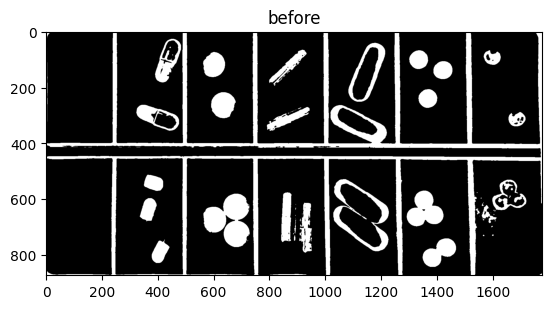

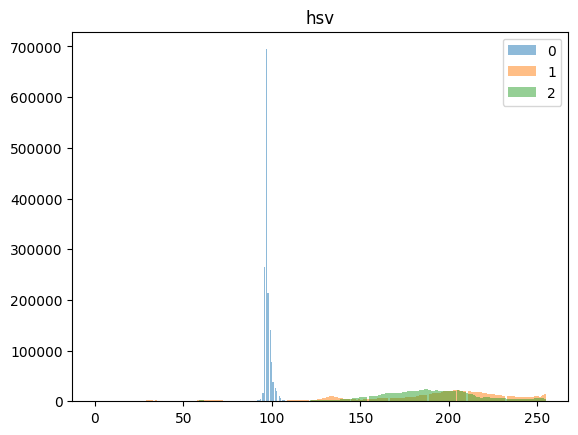

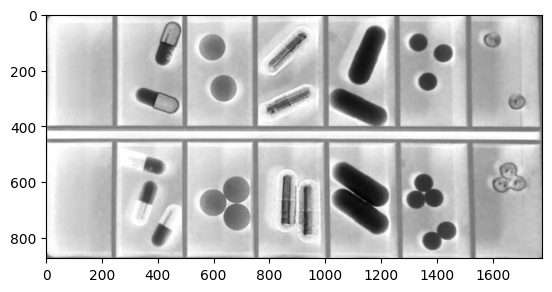

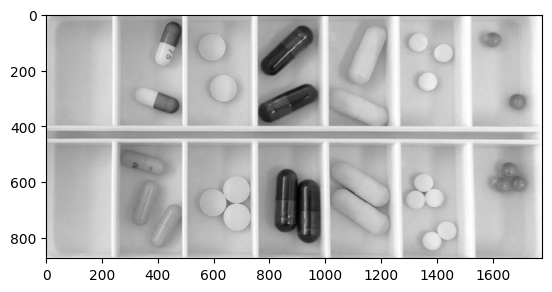

Detected 28 elements


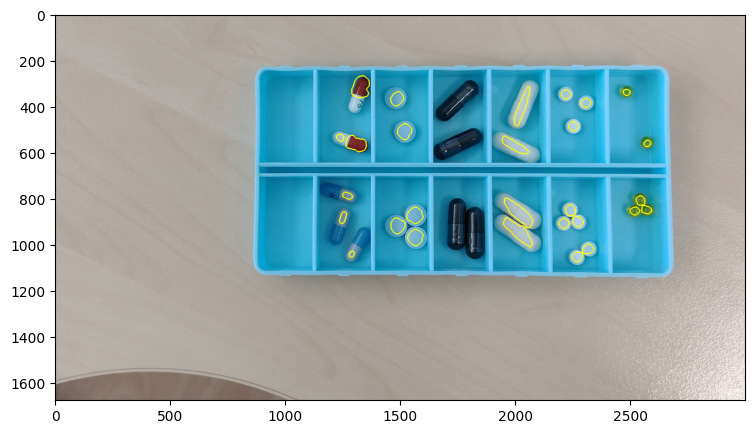

In [208]:
def show_hist(img, channels=3, title=''):
    if isinstance(channels, int):
        channels = [channels]
    for i in channels:
        plt.hist(img[..., i].flatten(), bins=255,
                 density=False, label=i, alpha=0.5)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()


def get_inner_img(img):
    contours_s = get_mask(img[..., 1])
    x, y, w, h = inner_loc(contours_s)
    margin = 20
    inner = img[y+margin:y+h-margin, x+margin:x+w-margin, :]
    return inner, x, y, margin


def inner_loc(contours_s):
    lengths = [c.shape[0] for c in contours_s]
    inner_contour = contours_s[lengths.index(max(lengths))]
    x, y, w, h = cv2.boundingRect(inner_contour)
    return x, y, w, h


def get_mask(image, mode=cv2.RETR_TREE):
    _, binary = cv2.threshold(
        image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, mode, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c for c in contours if c.shape[0] > 0]
    return contours


def get_countours(binary, mode=cv2.RETR_TREE, max_size=10e30):
    contours, _ = cv2.findContours(
        binary, mode, cv2.CHAIN_APPROX_SIMPLE)
    contours = [c for c in contours if c.shape[0]
                > 10 and c.shape[0] < max_size]
    return contours


def display_cont(contours, img, title=''):
    d = img.copy()
    cv2.drawContours(d, contours, -1, (255, 255, 0), 3)
    plt.figure(figsize=(10, 5))
    plt.imshow(d)
    plt.title(title)
    plt.show()


def morph_img(croped_mask_rest, dilate_kernel=None, erode_kernel=None):
    if dilate_kernel is None:
        dilate_kernel = (10, 10)
    if erode_kernel is None:
        erode_kernel = (30, 10)
    k_e = cv2.getStructuringElement(cv2.MORPH_RECT, erode_kernel)
    k_d = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, dilate_kernel)

    croped_mask_rest = cv2.erode(
        croped_mask_rest, kernel=k_e, anchor=(-1, -1), borderType=cv2.BORDER_REPLICATE)
    croped_mask_rest = cv2.dilate(
        croped_mask_rest, kernel=k_d, anchor=(-1, -1), borderType=cv2.BORDER_REPLICATE)
    return croped_mask_rest


def blur_img(calib_croped):
    return cv2.GaussianBlur(calib_croped, (5, 5), sigmaX=5)


def move_countours(cn, x, y, margin):
    cnn = []
    for c in cn:
        c[..., 0] = c[..., 0] + x + margin
        c[..., 1] = c[..., 1] + y + margin
        cnn.append(c)
    return cnn


def detect_objects(calib: np.ndarray, **kwargs) -> List:
    if 'verbose' in kwargs:
        verbose = kwargs['verbose']
    else:
        verbose = False
    calib_hsv = cv2.cvtColor(calib, cv2.COLOR_BGR2HSV)
    calib_croped, x, y, margin = get_inner_img(calib_hsv)

    calib_croped = blur_img(calib_croped)

    _, mask_green = cv2.threshold(
        (calib_croped[..., 0] - 10) % 255, 58, 255, cv2.THRESH_BINARY_INV)

    # _, mask_white = cv2.threshold(
    #     calib_croped[..., 2], 200, 255, cv2.THRESH_BINARY_INV)


    # _, croped_mask_rest = cv2.threshold(calib_croped[..., 0], 99, 255, cv2.THRESH_BINARY)
    _, mask_long_white = cv2.threshold(
        calib_croped[..., 1], 50, 255, cv2.THRESH_BINARY_INV)

    mask_long_white = morph_img(mask_long_white)
    mask_green = morph_img(mask_green, dilate_kernel=(
        20, 20), erode_kernel=(30, 30))
    rest_for_mask = (calib_croped[..., 1] - 55) % 255
    
    _, mask_rest = cv2.threshold(
        rest_for_mask, 100, 255, cv2.THRESH_BINARY_INV)

    if verbose:
        plt.imshow(mask_rest, cmap='gray')
        plt.title('before')
        plt.show()
    
    mask_rest = morph_img(mask_rest, dilate_kernel=(
        20, 20), erode_kernel=(35, 35))
    
    red_for_mask = (calib_croped[..., 0] - 10) % 255
    _, mask_red = cv2.threshold(
        red_for_mask, 200, 255, cv2.THRESH_BINARY)
    mask_red = morph_img(mask_red, dilate_kernel=(
        30, 30), erode_kernel=(1, 1))

    
    if verbose:
        show_hist(calib_croped, title='hsv', channels=[0, 1, 2])
        plt.imshow(calib_croped[...,1], cmap='gray')
        plt.show()
        plt.imshow(calib_croped[...,2], cmap='gray')
        plt.show()

    cn_long_white = get_countours(mask_long_white)
    cn_long_white = move_countours(cn_long_white, x, y, margin)

    cn_green = get_countours(mask_green)
    cn_green = move_countours(cn_green, x, y, margin)

    cn_rest = get_countours(mask_rest + mask_red)
    cn_rest = move_countours(cn_rest, x, y, margin)

    return cn_long_white + cn_green + cn_rest


cn = detect_objects(calib.copy(), verbose=True)
print(f'Detected {len(cn)} elements')
display_cont(cn, cv2.cvtColor(calib, cv2.COLOR_BGR2RGB))


In [97]:
COLORS = [
  (255, 0, 0),
  (0, 255, 0),
  (0, 0, 255),
  (255, 255, 0),
  (255, 0, 255),
  (0, 255, 255),
]

def display_objects(image:np.ndarray, objects:List) -> None:
  d = image.copy()
  d = cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
  cv2.drawContours(d, objects, -1, (255, 255, 0), 3)
  plt.figure(figsize=(10, 5))
  plt.imshow(d)
  plt.show()

{}


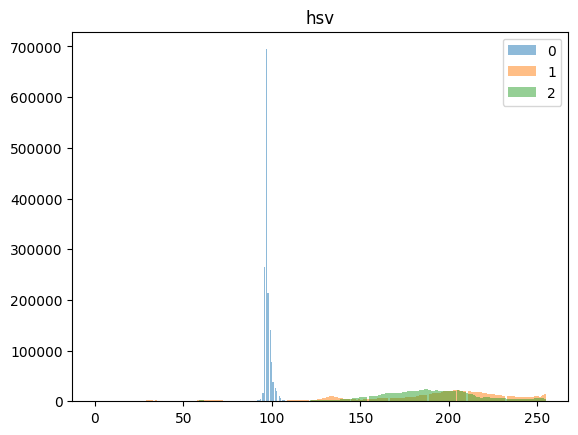

4


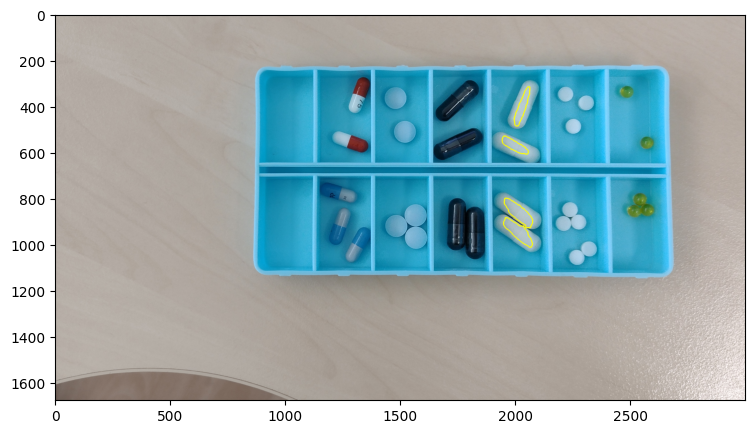

In [98]:
found = detect_objects(calib)
display_objects(calib, found)

### Zadanie 2
Dodaj do pipeline'u przetwarzania algorytm analizy obiektów, pozwalający na rozróżnienie obiektów poszczególnych klas.
Podejście jest zupełnie dowolne:
możesz zaimplementować go jako osobną procedurę (post-processing uzyskanych konturów) opartą o analizę kształtu i barwy,
możesz próbować zintegrować go z detekcją obiektów.
Obowiązuje tylko jedno zastrzeżenie: algorytm powinien być "klasyczny", tj. bez użycia uczenia maszynowego.

Jakkolwiek zdecydujesz, wyjściem algorytmu powinny być poetykietowane obiekty (kontur/bbox + etykieta).
Dodaj implementację funkcji `display_recognized` do rysowania wykrytych instancji;
skorzystaj z podanej mapy kolorów.

_Pro-tip do podejścia z post-processingiem konturów: zapoznaj się z metodami [zaawansowanego indeksowania macierzy](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing) w numpy, zwłaszcza indeksowaniem za pomocą macierzy binarnej. TL;DR: `obraz[maska]` powoduje odwołanie się tylko do tych pikseli obrazu `obraz`, które odpowiadają położeniem niezerowym pikselom maski._

In [ ]:
COLORMAP = {
  'keto': (0, 0, 255), # RGB
  'carbon': (0, 0, 0),
  'probio': (255, 255, 255),
  'biox': (255, 0, 255),
  'espu': (255, 255, 0),
  'line': (255, 0, 0),
  'dexi': (127, 127, 127)
}

def display_recognized(image:np.ndarray, objects:List) -> None:
  raise NotImplementedError

In [ ]:
found = detect_objects(calib)
#...
display_recognized(calib, found)

### Zadanie 3

Przetestuj uzyskany algorytm na obrazach `test1.png`, `test2.png` i `test3.png`.
Gdzie pojawiają się problemy, skąd się biorą?
Jak można im zaradzić?

In [ ]:
# miejsce na test - pozostaw wyniki działania oryginalnego algorytmu

In [ ]:
# miejsce na poprawki algorytmu

### Zadanie 4

Wykorzystaj transformację Hougha do wykrycia linii oddzielających poszczególne komórki organizera.
Dowolną poznaną metodą oblicz środki wykrytych obiektów.
Połącz obie informacje by określić zawartość każdej z komórek.

Wynik tej operacji powinien mieć formę struktury logicznej, pozwalającej na odpowiadanie na pytania np. "czy w 3 komórce dolnego rzędu są dwie sztuki `biox`?";
szczegóły układu tej struktury są dowolne.

Jak poprzednio, zacznij od obrazu `calib`, a gotowy algorytm przetestuj na obrazach testowych.